# Hypothesis Testing

(We are covering, what is referred to as, frequentist method of Hypothesis testing)

We would like to know if the effects we see in the sample(observed data) are likely to occur in the population. 

The way classical hypothesis testing works is by conducting a statistical test to answer the following question:
> Given the sample and an effect, what is the probability of seeing that effect just by chance?

Here are the steps on how we would do this

1. Compute test statistic
2. Define null hypothesis
3. Compute p-value
4. Interpret the result

If p-value is very low(most often than now, below 0.05), the effect is considered statistically significant. That means that effect is unlikely to have occured by chance. The inference? The effect is likely to be seen in the population too. 

This process is very similar to the *proof by contradiction* paradigm. We first assume that the effect is false. That's the null hypothesis. Next step is to compute the probability of obtaining that effect (the p-value). If p-value is very low(<0.05 as a rule of thumb), we reject the null hypothesis. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
cars = pd.read_csv("cars_v1.csv", encoding="ISO-8859-1")

In [4]:
mileage_is_null = cars.Mileage.notnull()

In [5]:
cars = cars.ix[mileage_is_null]

In [6]:
cars.head()

,Make,Model,Price,Type,ABS,BootSpace,GearType,AirBag,Engine,FuelCapacity,Mileage
0,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),750,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
1,Ashok Leyland Stile,Ashok Leyland Stile LS 8-STR (Diesel),800,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
2,Ashok Leyland Stile,Ashok Leyland Stile LX 8-STR (Diesel),830,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
3,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR (Diesel),850,MPV,No,500.0,Manual,No,1461.0,50.0,20.7
4,Ashok Leyland Stile,Ashok Leyland Stile LS 7-STR Alloy (Diesel),880,MPV,No,500.0,Manual,No,1461.0,50.0,20.7


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 832
Data columns (total 11 columns):
Make            662 non-null object
Model           662 non-null object
Price           662 non-null int64
Type            662 non-null object
ABS             656 non-null object
BootSpace       527 non-null float64
GearType        655 non-null object
AirBag          650 non-null object
Engine          659 non-null float64
FuelCapacity    662 non-null float64
Mileage         662 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 62.1+ KB


### Is the average mileage of Automatic cars significantly different from the average mileage of Manual cars ?


In [8]:
cars_Automatic = cars[cars.GearType==' Automatic'].copy().reset_index()
cars_Manual = cars[cars.GearType==' Manual'].copy().reset_index()

15.75

In [21]:
cars_Manual['Mileage'][::10][:6].values

array([ 20.7 ,  13.7 ,  22.1 ,  16.2 ,  13.58,  14.4 ])

In [32]:
# Mean and standard deviation of Manual Cars
print "Average Mileage of Automatic cars:", round(cars_Automatic['Mileage'].mean(), 2)
# print("Stddev of Automatic cars:", round(cars_Automatic['Mileage'].std(), 2))

#Mean and standard deviation of Manual Cars
print "Mean of Manual Cars:", round(cars_Manual['Mileage'].mean(), 2)
# print "Standard Deviation of Manual Cars:", round(cars_Manual['Mileage'].mean(), 2)

Average Mileage of Automatic cars: 15.75
Mean of Manual Cars: 19.11


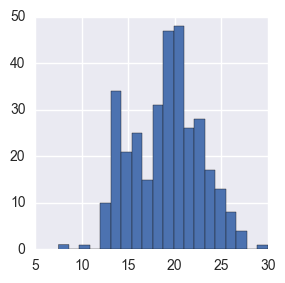

In [13]:
cars_Manual['Mileage'].hist(bins=20, figsize=(3, 3))

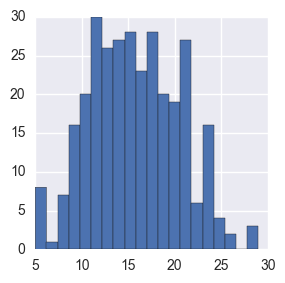

In [14]:
cars_Automatic['Mileage'].hist(bins=20, figsize=(3, 3))

<big>

For normally distributed data ... we know that 99% of the values are contained in the interval defined by

- MEAN +- 3xSTD

**Exercise**

In [15]:
#Confidence interval on the mean of manual cars
stats.norm.interval(0.95, 
                    loc=cars_Manual.Mileage.mean(), 
                    scale = cars_Manual.Mileage.std()/np.sqrt(len(cars_Manual)))

(18.70745412179004, 19.517818605482713)

**Exercise**

In [16]:
#Confidence interval on the mean of automatic cars
#Confidence interval on the mean of manual cars
stats.norm.interval(0.95, 
                    loc=cars_Automatic.Mileage.mean(), 
                    scale = cars_Automatic.Mileage.std()/np.sqrt(len(cars_Automatic)))

(15.212809833495369, 16.278122642388858)

**Effect Size**

In [33]:
print "Effect size:", round(cars_Manual.Mileage.mean() - cars_Automatic.Mileage.mean(), 2)

Effect size: 3.37


**Null Hypothesis**: Mean mileage aren't significantly different

Perform **t-test** and determine the p-value. 

In [18]:
stats.ttest_ind(cars_Manual.Mileage, cars_Automatic.Mileage)

Ttest_indResult(statistic=9.9313548109322571, pvalue=1.0337306243949073e-21)

p-value is the probability that the effective size was by chance. And here, p-value is almost 0.

*Conclusion*: The mileage difference is significant. 

### Assumption of t-test

- One assumption is that the data used came from a normal distribution. 
- Equal variances (homoskedasticity, or homogeneity of variances)

<br>

There's a [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro-Wilk) to test for normality. If p-value is less than 0.05, then there's a low chance that the distribution is normal.

In [39]:
stats.shapiro(cars_Manual.Mileage)

(0.9872176647186279, 0.005204247776418924)

In [40]:
stats.shapiro(cars_Automatic.Mileage)

(0.9908203482627869, 0.04923483356833458)

In [47]:
stats.shapiro?

In [48]:
stats.kstest?

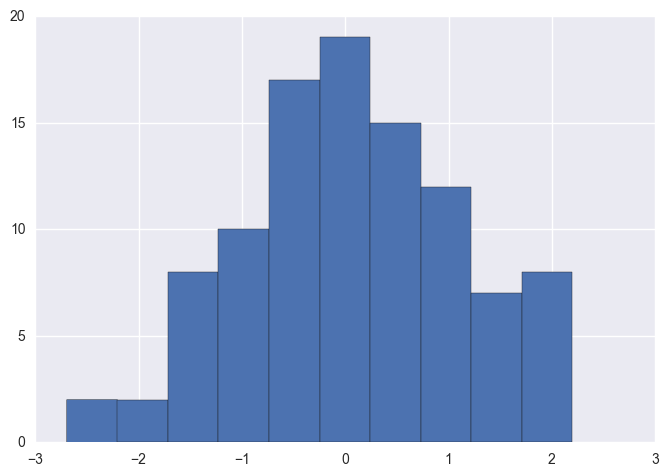

In [50]:
pd.Series(stats.norm.rvs(0, size=100)).hist()

In [54]:
x = stats.norm.rvs(loc=0.2, size=100)

In [55]:
stats.kstest(x, 'norm')

KstestResult(statistic=0.17990503114928885, pvalue=0.002648488709459107)

### A/B testing

Comparing two versions to check which one performs better. Eg: Show to people two variants for the same webpage that they want to see and find which one provides better conversion rate (or the relevant metric). [wiki](https://en.wikipedia.org/wiki/A/B_testing)

<h2> Something to think about: Which of these give smaller p-values ? </h2>
   
   * Smaller effect size
   * Smaller standard error
   * Smaller sample size
   * Higher variance
   
   **Answer:** 

### Chi-square tests

Chi-Square tests are used when the data are frequencies, rather than numerical score/price.

The following two tests make use of chi-square statistic

1. chi-square test for goodness of fit
2. chi-square test for independence

Chi-square test is a non-parametric test. They do not require assumptions about population parameters and they do not test hypotheses about population parameters.

<h2> Chi-Square test for goodness fit </h2>

In [19]:
cars2 = (cars
         .query("Type == 'Sedan' or Type == 'Hatchback'")
         .query("GearType == ' Manual' or GearType==' Automatic'"))

In [20]:
pd.crosstab(cars2.Type, cars2.GearType)

GearType,Automatic,Manual
Type,,
Hatchback,36,123
Sedan,145,91


In [21]:
stats.chi2_contingency(pd.crosstab(cars2.Type, cars2.GearType))

(56.052530702995135,
 7.0560324319103106e-14,
 1,
 array([[  72.85822785,   86.14177215],
        [ 108.14177215,  127.85822785]]))

$$ \chi^2 = \sum (O - E)^2/E $$

* O is observed frequency
* E is expected frequency
* $ \chi $ is the chi-square statistic

In [22]:
stats.chisquare(Observed, Expected)

NameError: name 'Observed' is not defined